# Cyberpunking Your Matplotlib Figures
### Taking Your Matplotlib Figures from Boring to Interesting with a Few Lines of Code

Medium Link: https://medium.com/towards-data-science/cyberpunking-your-matplotlib-figures-96f4d473185d
YouTube Video: https://youtu.be/zOht7H2gL9Q

When we create infographics or posters containing data, we want to catch the reader’s attention and make it aesthetically pleasing to look at whilst telling a convincing story.

Within Python, we have numerous plotting libraries that allow us to create charts — one such library is the well-known matplotlib library. However, out of the box, the plots generated by matplotlib are often seen as boring, and getting them to something visually appealing can be time-consuming.

This is where matplotlib theming libraries come into play. One favourite library of mine is the CyberPunk theme.

Cyberpunk has become a widely popular subgenre of science fiction, characterised by its portrayal of dystopian societies, highly advanced technology, and countercultural themes. These settings are typically depicted with a futuristic look, highlighted by neon lights and vibrant, bold colours.

The CyberPunk theme brings those neon and vibrant colours to matplotlib, and as you will see in this article, we can apply the styling with just two lines of Python code.

However, you have to be aware that plots generated with this styling may not be seen as professional when creating figures for publications, and it may not be suitable for readers with colour vision problems.

So, consideration must be given to your audience before you implement this styling.

## Importing Libraries and Creating Data
Before we start creating our visualisations, we need to import some libraries. These are matplotlib, pandas and numpy, which will be used for creating, storing our data and creating visualisations.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import mplcyberpunk

Once the libraries have been imported, we can create dummy data using the code below.

In [2]:
import pandas as pd
import numpy as np

# Create a list of categories
categories = ['A', 'B', 'C', 'D']

# Create a DataFrame with 4 columns and 4 rows
data = {
    'Category': categories,
    'Value1': np.random.randint(0, 20, 4),
    'Value2': np.random.randint(0, 20, 4),
    'Value3': np.random.randint(0, 20, 4),
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)


  Category  Value1  Value2  Value3
0        A      11       3       3
1        B      13       8       2
2        C       0       5      16
3        D       6       5       4


This code generates a pandas dataframe which consists of 4 columns: one of which is a categorical column, and the others are numeric and consist of random integers.

Bar Charts with Cyberpunk Colouring
The first chart we will create, and theme is the popular bar chart.

To create this chart, we can use the .plot() method from pandas, and pass in our x value, which is our categorical variable. We also need to set stacked to False and the kind parameter to bar.

<AxesSubplot:xlabel='Category'>

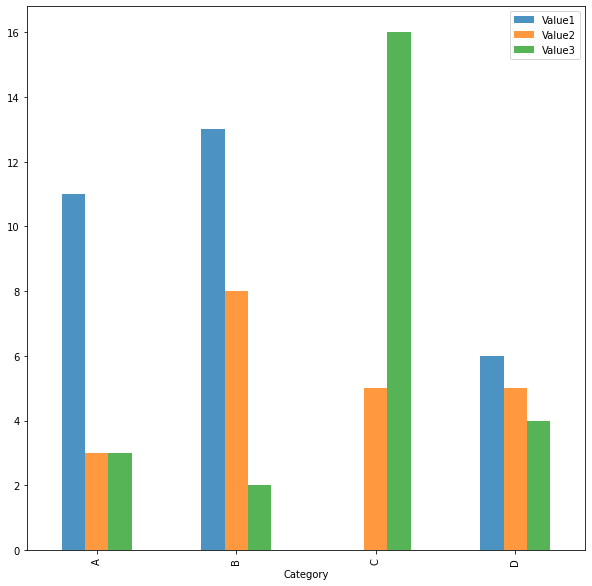

In [3]:
df.plot(x='Category', kind='bar', stacked=False, alpha=0.8, figsize=(10,10))

It is good; however, it lacks visual interest and could be made to look much better.

We can easily change that by adding a single line of code above the call to df.plot(), which will allow us to apply the CyberPunk theme to the plot.

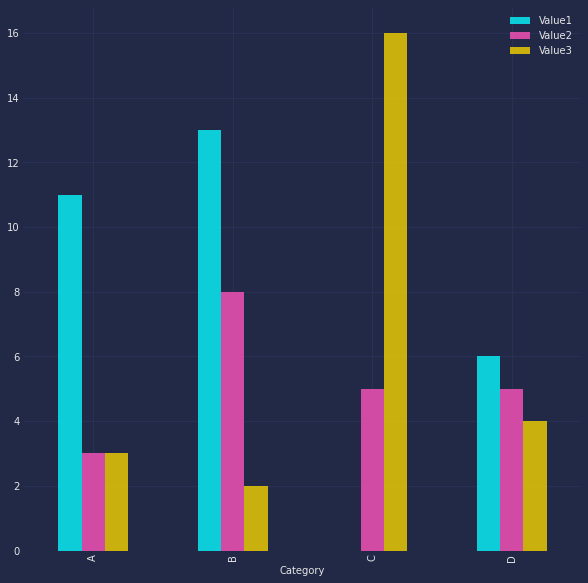

In [4]:
with plt.style.context('cyberpunk'):
    df.plot(x='Category', kind='bar', stacked=False, alpha=0.8, figsize=(10,10))

We can see that the plot background colours have switched to a dark theme, and the bars have been given a “neon” like appearance.

When creating bar charts with this theme, we may find that colours of the bars are too bright, which is why we have to apply an alpha value.

## Line Charts
We can do the same with line charts.

First, we call upon `df.plot()` but instead of `kind` being set to bar we can change it to line. With line plots, we can also add markers, which can help identify where our data is. This is useful if we have very little change in the values between categories.

<AxesSubplot:xlabel='Category'>

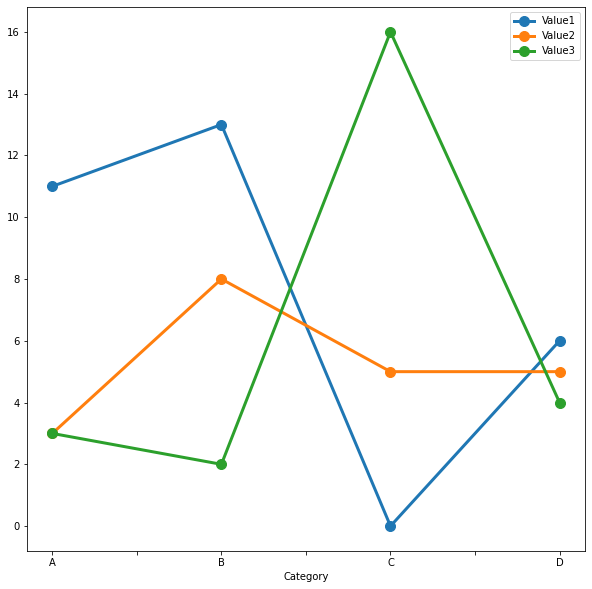

In [5]:
df.plot(x='Category', kind='line',
        lw=3, marker='.', ms=20,
        figsize=(10,10))


To apply the CyberPunk theme, we need to add the with `plt.style.context(‘cyberpunk’):` to our code.

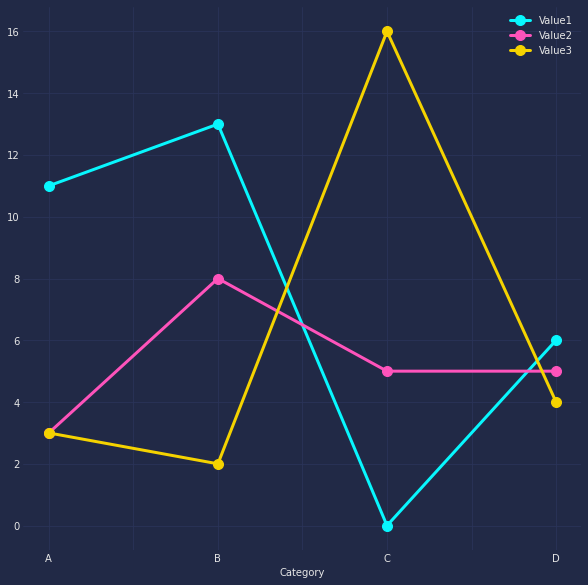

In [6]:
with plt.style.context('cyberpunk'):
    df.plot(x='Category', kind='line',
            lw=3, marker='.', ms=20,
            figsize=(10,10))


The CyberPunk theme library comes with a few additional features, such as making the lines glow.

And adding transparent gradient fills under the lines:

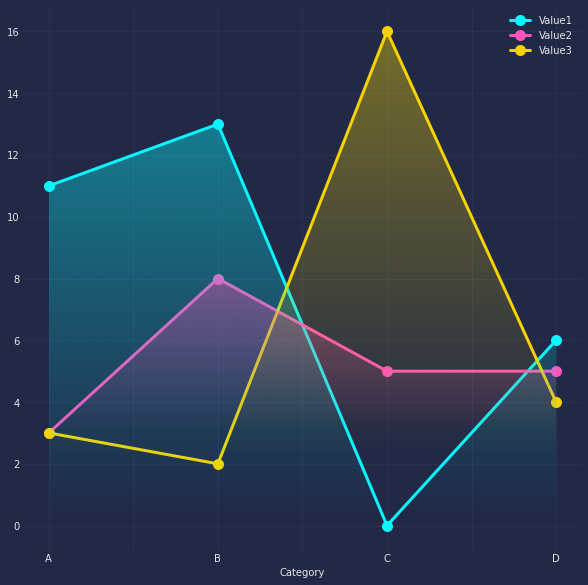

In [7]:
with plt.style.context('cyberpunk'):
    df.plot(x='Category', kind='line',
            lw=3, marker='.', ms=20,
            figsize=(10,10))
    mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.4)

Adding the gradient fills is nice if you are dealing with 1 or 2 lines, but it can get very messy once you start applying it to 3 or more lines as the gradients start to merge together.

## Radar Plots With CyberPunk Styling
Radar plots (spider plots or radar charts) are a popular and widely used data visualisation tool. They allow us to compare datasets by displaying multiple variables simultaneously on a 2-dimensional plot.

Generating radar charts requires more matplotlib code to get them to display nicely.

In [8]:
categories = [*categories, categories[0]]
values_1 = [*data['Value1'], data['Value1'][0]]
values_2 = [*data['Value2'], data['Value2'][0]]
values_3 = [*data['Value3'], data['Value3'][0]]

In [9]:
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))

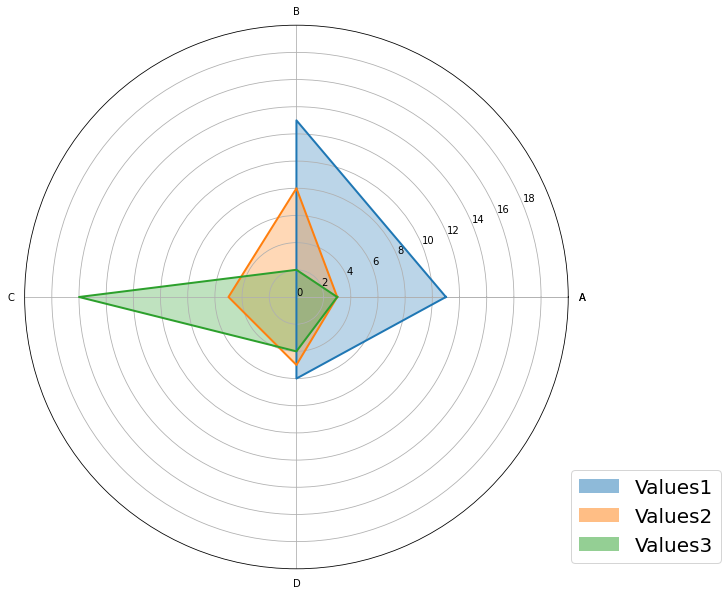

In [10]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))

ax.plot(label_loc, values_1, lw=2)
ax.plot(label_loc, values_2, lw=2)
ax.plot(label_loc, values_3, lw=2)

ax.fill(label_loc, values_1, alpha=0.3)
ax.fill(label_loc, values_2, alpha=0.3)
ax.fill(label_loc, values_3, alpha=0.3)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)

# ax.tick_params(axis='both', which='major', pad=30, labelsize=15)

# ax.spines['polar'].set_linewidth(3)

# edge_color = (1, 1, 1, 0.2) 
# ax.spines['polar'].set_color(edge_color) 

# ax.grid(color='white', alpha=0.3)

ax.set_ylim(0, 20)
ax.set_yticks(np.arange(0, 20, 2))

# Create custom legend handles
values_1_legend = Patch(facecolor='C0', alpha=0.5, label='Values1')
values_2_legend = Patch(facecolor='C1', alpha=0.5, label='Values2')
values_3_legend = Patch(facecolor='C2', alpha=0.5, label='Values3')

# Add a legend with custom position and handles
ax.legend(handles=[values_1_legend, values_2_legend, values_3_legend],
          bbox_to_anchor=(1.3, 0.2), fontsize=20, 
          frameon=True)


plt.show()

We apply the same line as before to convert the basic radar plot to a CyberPunk theme.

However, we also need to change the spines and grid so that we can see them.

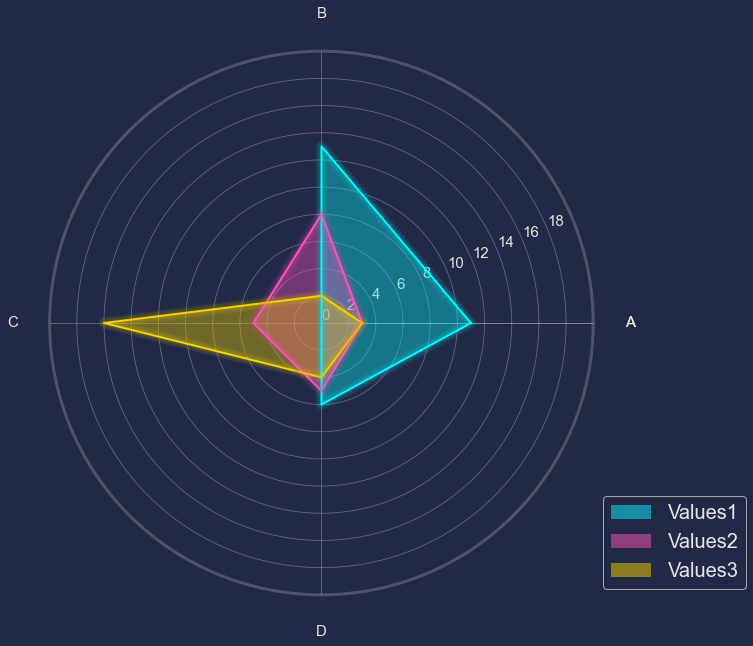

In [11]:
from matplotlib.patches import Patch

with plt.style.context('cyberpunk'):
    fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))

    # Add our data as separate axes
    ax.plot(label_loc, values_1, lw=2)
    ax.plot(label_loc, values_2, lw=2)
    ax.plot(label_loc, values_3, lw=2)

    # Apply a fill to our lines
    ax.fill(label_loc, values_1, alpha=0.3)
    ax.fill(label_loc, values_2, alpha=0.3)
    ax.fill(label_loc, values_3, alpha=0.3)

    # Convert the lines and labels to a polar grid
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    
    # Set up the grid and line properties
    ax.tick_params(axis='both', which='major', pad=30, labelsize=15)

    ax.spines['polar'].set_linewidth(3)
    
    edge_color = (1, 1, 1, 0.2) 
    ax.spines['polar'].set_color(edge_color) 
    
    ax.grid(color='white', alpha=0.3)
    
    # Setup the radial lines
    ax.set_ylim(0, 20)
    ax.set_yticks(np.arange(0, 20, 2))
    
    # Create custom legend handles
    values_1_legend = Patch(facecolor='C0', alpha=0.5, label='Values1')
    values_2_legend = Patch(facecolor='C1', alpha=0.5, label='Values2')
    values_3_legend = Patch(facecolor='C2', alpha=0.5, label='Values3')

    # Add a legend with custom position and handles
    ax.legend(handles=[values_1_legend, values_2_legend, values_3_legend],
              bbox_to_anchor=(1.3, 0.2), fontsize=20, 
              frameon=True)
    
    mplcyberpunk.add_glow_effects()

    plt.show()

## Working With Subplots and CyberPunk Styling
When creating figures with matplotlib, we often want to show multiple plots. The types of plots can vary depending on what you are looking to show.

This example shows how to create a matplotlib figure with 4 subplots: 2 line plots, a scatter plot and a bar chart.

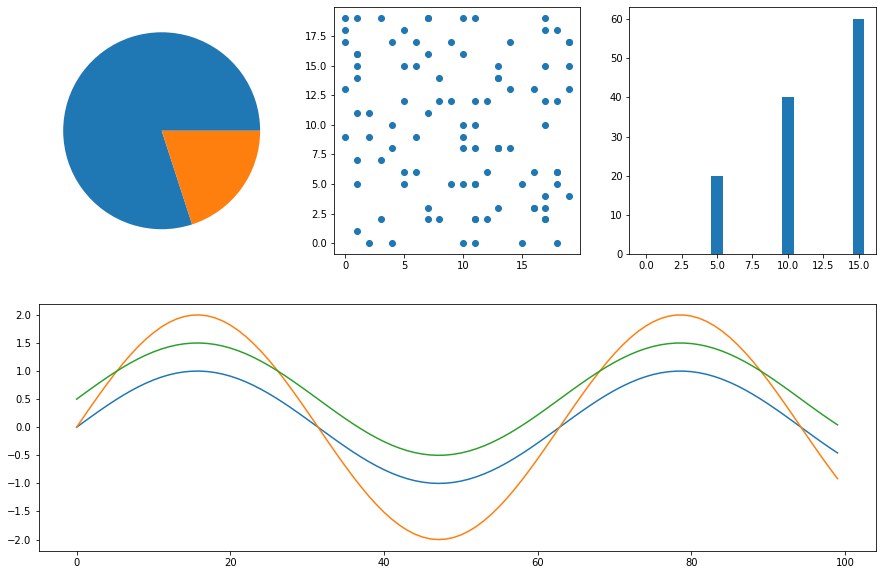

In [12]:
fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot2grid((2,3), (0,0))
ax2 = plt.subplot2grid((2,3), (0,1))
ax3 = plt.subplot2grid((2,3), (0,2))
ax4 = plt.subplot2grid((2,3), (1,0), colspan=3)

ax1.pie(x=[80,20])

ax2.scatter(x=(np.random.randint(0, 20, 100)), y=np.random.randint(0,20, 100))

bar_values = np.arange(0, 20, 5)
bar_heights = bar_values * np.random.randint(1, 5)
ax3.bar(x=bar_values, height=bar_heights)

values = np.arange(0, 10, 0.1)
sine_wave1 = np.sin(values)
sine_wave2 = sine_wave1 * 2
sine_wave3 = sine_wave1 + 0.5

ax4.plot(sine_wave1)
ax4.plot(sine_wave2)
ax4.plot(sine_wave3)

plt.show()


To make sure our CyberPunk styling is applied, we can add in the line: `with plt.style.context(‘cyberpunk’):`

If we want to apply any of the special styling from the mplcyberpunk library, such as glows, we need to specify the axis where we want to apply that style by passing in the ax object to the ax parameter.

For example: `mplcyberpunk.make_lines_glow(ax=ax4)`

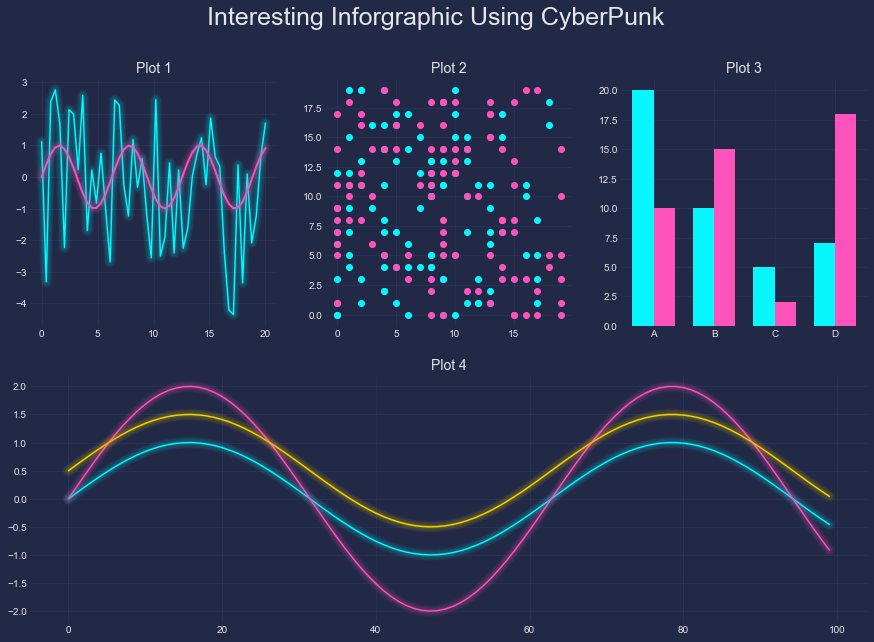

In [13]:
with plt.style.context('cyberpunk'):
    fig = plt.figure(figsize=(15, 10))

    ax1 = plt.subplot2grid((2,3), (0,0))
    ax2 = plt.subplot2grid((2,3), (0,1))
    ax3 = plt.subplot2grid((2,3), (0,2))
    ax4 = plt.subplot2grid((2,3), (1,0), colspan=3)

    # Line Plot 1
    x_data = np.linspace(0, 20, 50)
    y_data_clean = np.sin(x_data)
    noise = np.random.normal(0, 2, y_data_clean.shape)
    y_data_noise = y_data_clean + noise
    
    ax1.plot(x_data, y_data_noise)
    ax1.plot(x_data, y_data_clean, lw=2)
    ax1.set_title('Plot 1', fontsize=14)
    
    # Scatter Plots
    ax2.scatter(x=(np.random.randint(0, 20, 100)), y=np.random.randint(0,20, 100))
    ax2.scatter(x=(np.random.randint(0, 20, 100)), y=np.random.randint(0,20, 100))
    ax2.set_title('Plot 2', fontsize=14)
    
    # Bar Chart
    bar_values = np.array(["A", "B", "C", "D"])
    bar_heights = ([20, 10, 5, 7])
    bar_heights_2 = ([10, 15, 2, 18])
    bar_width = 0.35
    
    bar_pos_1 = np.arange(len(bar_values))
    bar_pos_2 = [x + bar_width for x in bar_pos_1]
    
    
    ax3.bar(x=bar_pos_1, height=bar_heights, width=bar_width, label='Group 1')
    ax3.bar(x=bar_pos_2, height=bar_heights_2, width=bar_width, label='Group 2')
    ax3.set_xticks([r + bar_width / 2 for r in range(len(bar_heights))])
    ax3.set_xticklabels(bar_values)
    ax3.set_title('Plot 3', fontsize=14)

    # Bottom Axis
    values = np.arange(0, 10, 0.1)
    sine_wave1 = np.sin(values)
    sine_wave2 = sine_wave1 * 2
    sine_wave3 = sine_wave1 + 0.5

    ax4.plot(sine_wave1)
    ax4.plot(sine_wave2)
    ax4.plot(sine_wave3)
    ax4.set_title('Plot 4', fontsize=14)
    
    
    mplcyberpunk.make_lines_glow(ax=ax1)
    mplcyberpunk.make_lines_glow(ax=ax4)

    plt.suptitle('Interesting Inforgraphic Using CyberPunk', fontsize=25)
    plt.show()
